# Project Title: Predicting Power Consumption in Tetouan City

### Project Goal: To predict the total power consumption of three zones in Tetouan City using machine learning, specifically Linear Regression. The project aims to evaluate the prediction accuracy using test data.

### Dataset:

- The project uses the "Tetuan City power consumption" dataset from the UCI Machine Learning Repository.
- The dataset contains 52,415 records with 5 features (Temperature, Humidity, Wind Speed, general diffuse flows, and diffuse flows) and 3 target variables (power consumption of zone 1, zone 2, and zone 3).

Project Workflow:
1. Data Preparation:
- Import necessary libraries (NumPy, Pandas).

In [ ]:
import numpy as np
import pandas as pd
np.random.seed(42)

- Load the dataset from a CSV file.

In [ ]:
data = pd.read_csv('Tetuan City power consumption.csv')
data

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
39185,9/30/2017 2:50,17.070,85.2,4.917,0.073,0.133,26894.86726,15825.77963,12973.23800
39186,9/30/2017 3:00,17.050,85.2,4.918,0.095,0.107,26786.54867,15747.19335,12890.86823
39187,9/30/2017 3:10,16.950,85.5,4.918,0.069,0.126,26843.89381,15807.06861,12843.79980
39188,9/30/2017 3:20,16.810,85.8,4.918,0.088,0.119,27047.78761,15735.96674,12867.33401


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39190 entries, 0 to 39189
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   39190 non-null  object 
 1   Temperature                39190 non-null  float64
 2   Humidity                   39190 non-null  float64
 3   Wind Speed                 39190 non-null  float64
 4   general diffuse flows      39190 non-null  float64
 5   diffuse flows              39190 non-null  float64
 6   Zone 1 Power Consumption   39189 non-null  float64
 7   Zone 2  Power Consumption  39189 non-null  float64
 8   Zone 3  Power Consumption  39189 non-null  float64
dtypes: float64(8), object(1)
memory usage: 2.7+ MB


In [ ]:
column_names = list(data.columns)
print(column_names)

['DateTime', 'Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows', 'Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']


In [ ]:
#rename columns
new_column_names = [column.lower().replace(' ','_').replace('__','_') for column in column_names]
print(new_column_names)

['datetime', 'temperature', 'humidity', 'wind_speed', 'general_diffuse_flows', 'diffuse_flows', 'zone_1_power_consumption', 'zone_2_power_consumption', 'zone_3_power_consumption']


In [ ]:
data.columns = new_column_names
data

,datetime,temperature,humidity,wind_speed,general_diffuse_flows,diffuse_flows,zone_1_power_consumption,zone_2_power_consumption,zone_3_power_consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
39185,9/30/2017 2:50,17.070,85.2,4.917,0.073,0.133,26894.86726,15825.77963,12973.23800
39186,9/30/2017 3:00,17.050,85.2,4.918,0.095,0.107,26786.54867,15747.19335,12890.86823
39187,9/30/2017 3:10,16.950,85.5,4.918,0.069,0.126,26843.89381,15807.06861,12843.79980
39188,9/30/2017 3:20,16.810,85.8,4.918,0.088,0.119,27047.78761,15735.96674,12867.33401


- Create a new column 'all_power_consumption' by summing the power consumption of all three zones.

In [ ]:
data['all_power_consumption'] = data.iloc[: , 6:9].sum(axis=1)
data

,datetime,temperature,humidity,wind_speed,general_diffuse_flows,diffuse_flows,zone_1_power_consumption,zone_2_power_consumption,zone_3_power_consumption,all_power_consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,70425.53544
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,69320.84387
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,67803.22193
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,65489.23209
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,63650.44627
...,...,...,...,...,...,...,...,...,...,...
39185,9/30/2017 2:50,17.070,85.2,4.917,0.073,0.133,26894.86726,15825.77963,12973.23800,55693.88489
39186,9/30/2017 3:00,17.050,85.2,4.918,0.095,0.107,26786.54867,15747.19335,12890.86823,55424.61025
39187,9/30/2017 3:10,16.950,85.5,4.918,0.069,0.126,26843.89381,15807.06861,12843.79980,55494.76222
39188,9/30/2017 3:20,16.810,85.8,4.918,0.088,0.119,27047.78761,15735.96674,12867.33401,55651.08836


- Define features (independent variables) and target (dependent variable).

In [ ]:
list_columns = ['temperature', 'humidity', 'wind_speed', 'general_diffuse_flows', 'diffuse_flows']
features = data[list_columns]

# target_columns = ['zone_1_power_consumption', 'zone_2_power_consumption', 'zone_3_power_consumption']
target_columns = ['all_power_consumption']
target = data[target_columns]

2. Model Training:
- Split the data into training (80%) and testing (20%) sets.
- Create a Linear Regression model.
- Train the model using the training data.

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Select features (independent variables) and target (dependent variable)
features = data[list_columns]  # `list_columns` contains the feature column names
target = data['all_power_consumption']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


3. Model Evaluation:
- Make predictions on the test data.
- Evaluate the model's performance using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

In [ ]:
# Print error metrics
print("Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Model Performance:
Mean Absolute Error (MAE): 12444.72
Mean Squared Error (MSE): 233097487.12
Root Mean Squared Error (RMSE): 15267.53


In [ ]:
# Initialize the linear regression model
reg = LinearRegression()

# Train the model using the training data
reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = reg.predict(X_test)


In [ ]:
reg.coef_

array([1481.05320391, -154.03715097, -128.20975513,   -8.86903499,
         -4.88492029])

In [ ]:
#evaluate
print("MAE:",mean_absolute_error(y_test, y_pred))
print("MSE:" , mean_squared_error(y_test, y_pred))
print("RMSE:" , mean_squared_error(y_test, y_pred, squared=False))

MAE: 12444.71717765203
MSE: 233097487.12174436
RMSE: 15267.530485371377


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
print(y_test.to_numpy())
print(y_pred)

[45343.08939 66752.35359 69244.97767 ... 76002.78583 68011.68779
 98167.45195]
[63693.38677118 75168.03344492 78312.26126423 ... 76334.66590949
 78636.88531073 75239.77700879]


- Visualize the predictions against the actual values using plots.

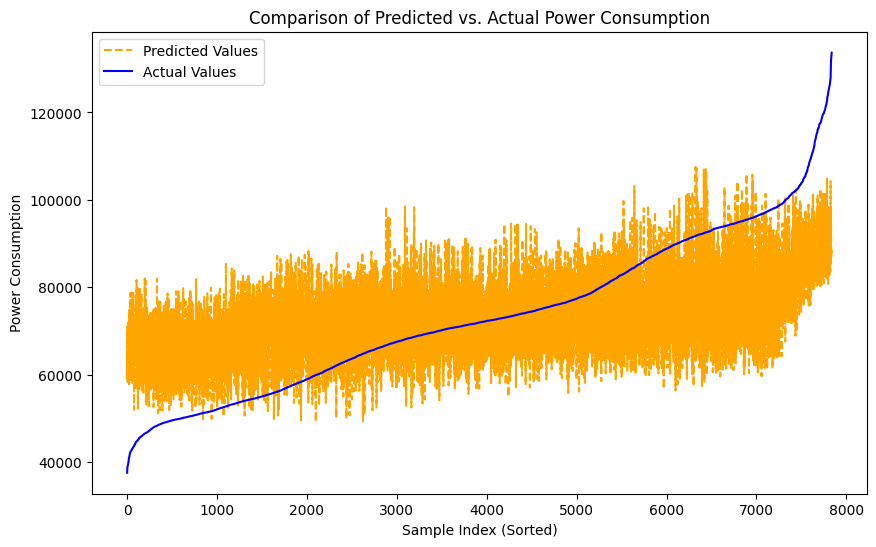

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure inline plotting (for Jupyter Notebook)
%matplotlib inline

# Sort predictions and ground truth by test set values for easy comparison
sorted_indices = np.argsort(y_test)
sorted_predictions = y_pred[sorted_indices]
sorted_actuals = y_test.to_numpy()[sorted_indices]

# Plot predictions vs. ground truth
plt.figure(figsize=(10, 6))
plt.plot(sorted_predictions, label='Predicted Values', color='orange', linestyle='--')
plt.plot(sorted_actuals, label='Actual Values', color='blue')

# Add labels and title
plt.xlabel('Sample Index (Sorted)')
plt.ylabel('Power Consumption')
plt.title('Comparison of Predicted vs. Actual Power Consumption')
plt.legend()

# Display the plot
plt.show()


4. Cross-Validation:
- Perform 5-fold cross-validation to assess the model's generalization performance.

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation and calculate Mean Absolute Error (MAE)
mae_scores = -cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

# Display each fold's Mean Absolute Error (MAE) and summary statistics
print("Cross-Validation MAE for each fold :", mae_scores)
print(f"Average MAE: {mae_scores.mean():.2f}")
print(f"Standard Deviation of MAE: {mae_scores.std():.2f}")


Cross-Validation MAE for each fold : [12216.62290626 12370.39115122 12436.94268814 12181.48050229
 12341.25836313]
Average MAE: 12309.34
Standard Deviation of MAE: 95.89


In [ ]:
# Perform 5-fold cross-validation and calculate Mean Squared Error (MSE)
mse_scores = -cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Display each fold's MSE and summary statistics
print("Cross-Validation Mean Squared Errors (MSE) for each fold:", mse_scores)
print(f"Average MSE: {mse_scores.mean():.2f}")
print(f"Standard Deviation of MSE: {mse_scores.std():.2f}")


Cross-Validation Mean Squared Errors (MSE) for each fold: [2.25503807e+08 2.31905525e+08 2.29859272e+08 2.22339848e+08
 2.25566367e+08]
Average MSE: 227034963.93
Standard Deviation of MSE: 3413045.84


- Calculate and visualize the average MAE and MSE scores across the folds.

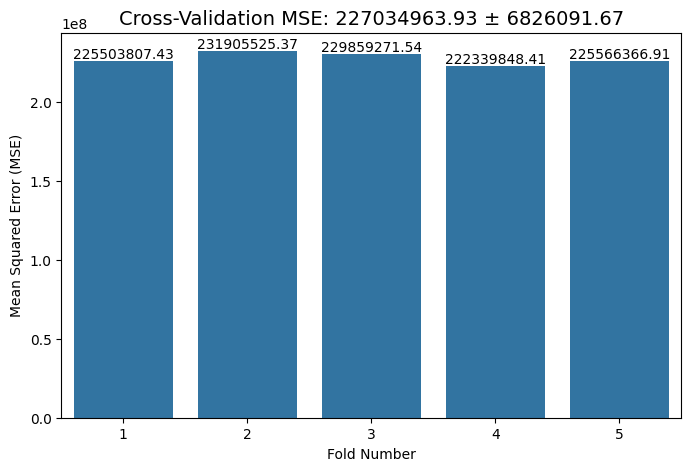

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot MSE scores for each fold
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=list(range(1, 6)), y=mse_scores)

# Customize the plot for clarity
ax.set(xlabel='Fold Number', ylabel='Mean Squared Error (MSE)')
ax.set_title(f'Cross-Validation MSE: {mse_scores.mean():.2f} ± {mse_scores.std()*2:.2f}', fontsize=14)
ax.bar_label(ax.containers[0], fmt='%.2f')  # Show MSE values on bars

# Display the plot
plt.show()


Project Conclusion:

- The model achieves reasonable accuracy in predicting total power consumption.
- Predictions are more accurate for specific sample ranges (e.g., between 2000 and 9000).
- The total power consumption tends to increase with a higher number of samples.